# PROJECT - **Unsupervised Anamoly Detection**

---
## DATASET - **Healthcare Providers Data For Anomaly Detection**

---
### NAME - **Shrikar Gaikar**

Mount Google Drive

In [1]:
# Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [3]:
# Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


Descriptive Statistics

In [4]:
# Displaying descriptive statistics
data.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


Dataset Information

In [5]:
# Displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

### Data Preprocessing

---



Convert Object Columns to Numeric Type

In [6]:
# Converting object columns to numeric type where necessary
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Verifying data types after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

Handle Missing Values

In [7]:
# Checking for missing values and imputing them with the mean
print(data.isnull().sum())

# Imputation of missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Checking for missing values post imputation
print(data.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

Check for Duplicate Values

In [8]:
# Checking for duplicate values
print(data.duplicated().sum())

0


Merge Name Columns

In [9]:
# Merging the name columns into a single column
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()

# Dropping the original name columns
data = data.drop(columns=['Last Name/Organization Name of the Provider',
                          'First Name of the Provider',
                          'Middle Initial of the Provider'])

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name
0,8774979,1891106191,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,...,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA
1,3354385,1346202256,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,...,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES
2,3001884,1306820956,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,...,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER
3,7594822,1770523540,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,...,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD
4,746159,1073627758,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,...,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI


Merge Address Columns

In [10]:
# Merging the address columns into a single column
data['Full Address'] = data['Street Address 1 of the Provider'].fillna('') + ' ' + \
                       data['Street Address 2 of the Provider'].fillna('')
data['Full Address'] = data['Full Address'].str.strip()

# Dropping the original address columns
data = data.drop(columns=['Street Address 1 of the Provider',
                          'Street Address 2 of the Provider'])

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name,Full Address
0,8774979,1891106191,M.D.,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA,1402 S GRAND BLVD FDT 14TH FLOOR
1,3354385,1346202256,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES,2950 VILLAGE DR
2,3001884,1306820956,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER,20 WASHINGTON AVE STE 212
3,7594822,1770523540,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD,5746 N BROADWAY ST
4,746159,1073627758,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI,875 MILITARY TRL SUITE 200


Standardize Credentials Column

In [11]:
# Standardizing the credentials column
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()

data.head()

,index,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Full Name,Full Address
0,8774979,1891106191,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,SATYASREE UPADHYAYULA,1402 S GRAND BLVD FDT 14TH FLOOR
1,3354385,1346202256,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,WENDY P JONES,2950 VILLAGE DR
2,3001884,1306820956,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,RICHARD W DUROCHER,20 WASHINGTON AVE STE 212
3,7594822,1770523540,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,JASPER FULLARD,5746 N BROADWAY ST
4,746159,1073627758,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,ANTHONY E PERROTTI,875 MILITARY TRL SUITE 200


## Exploratory Data Analysis (EDA)

---



### 1. Univariate Analysis

---



Distribution of Provider Credentials

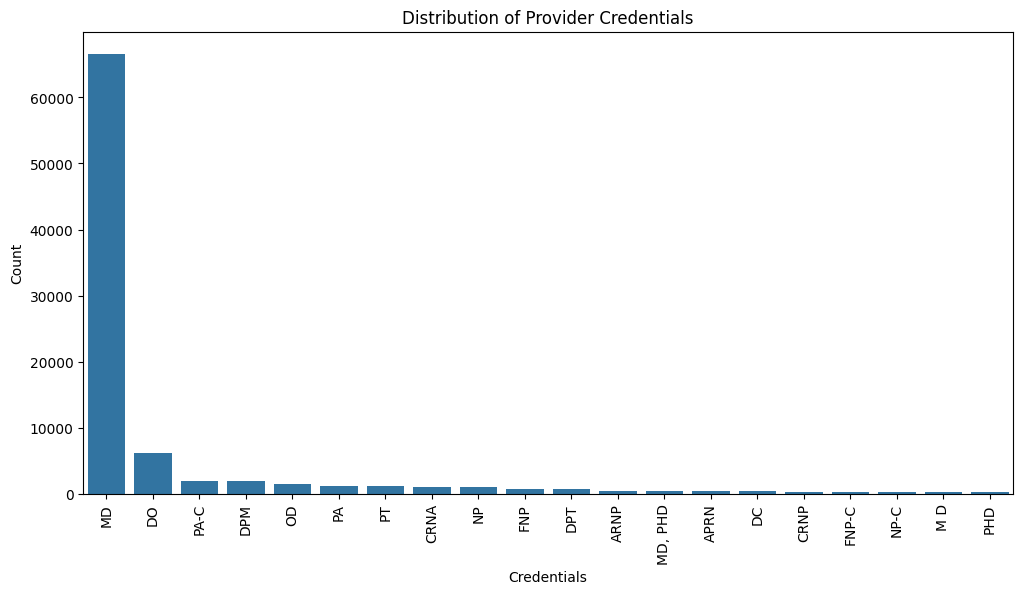

In [12]:
# Plotting the distribution of provider credentials
credentials_counts = data['Credentials of the Provider'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=credentials_counts.index, y=credentials_counts.values)
plt.title('Distribution of Provider Credentials')
plt.xlabel('Credentials')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Number of Providers by State

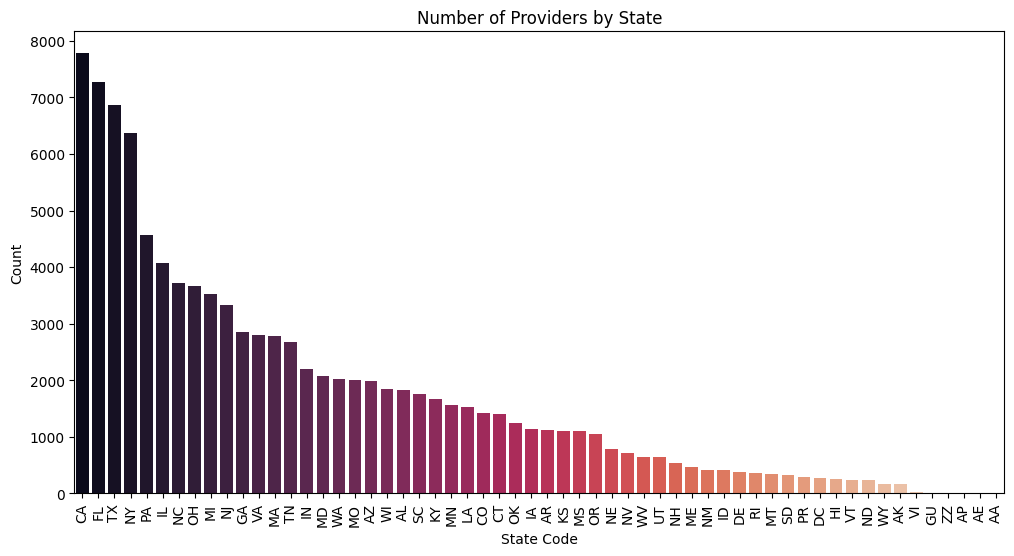

In [13]:
# Plotting the number of providers by state
state_counts = data['State Code of the Provider'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='rocket')
plt.title('Number of Providers by State')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Distribution of Provider Types

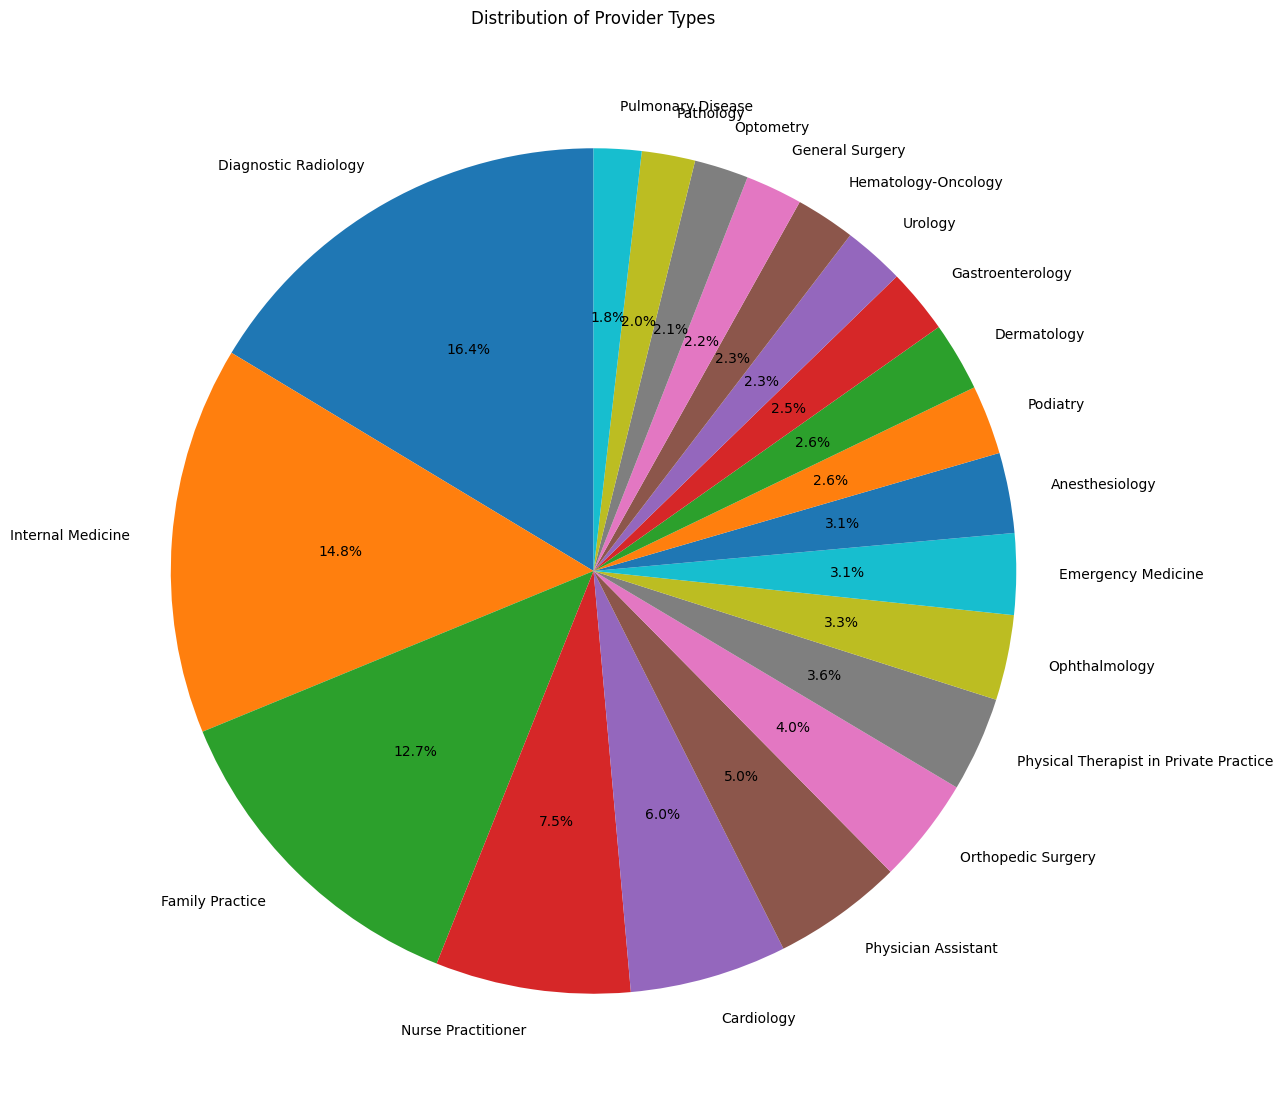

In [14]:
# Plotting the distribution of provider types
provider_type_counts = data['Provider Type'].value_counts().head(20)

plt.figure(figsize=(12, 14))
plt.pie(provider_type_counts, labels=provider_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Provider Types')
plt.axis('equal')
plt.show()

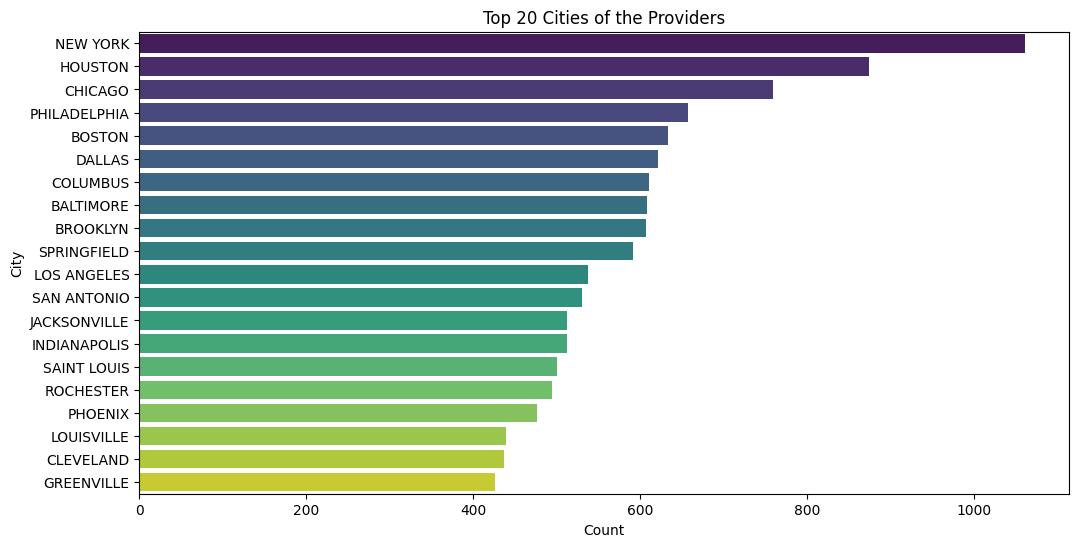

In [15]:
# Plotting the top 20 cities of the providers
city_counts = data['City of the Provider'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Top 20 Cities of the Providers')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

Distribution of Numeric Columns

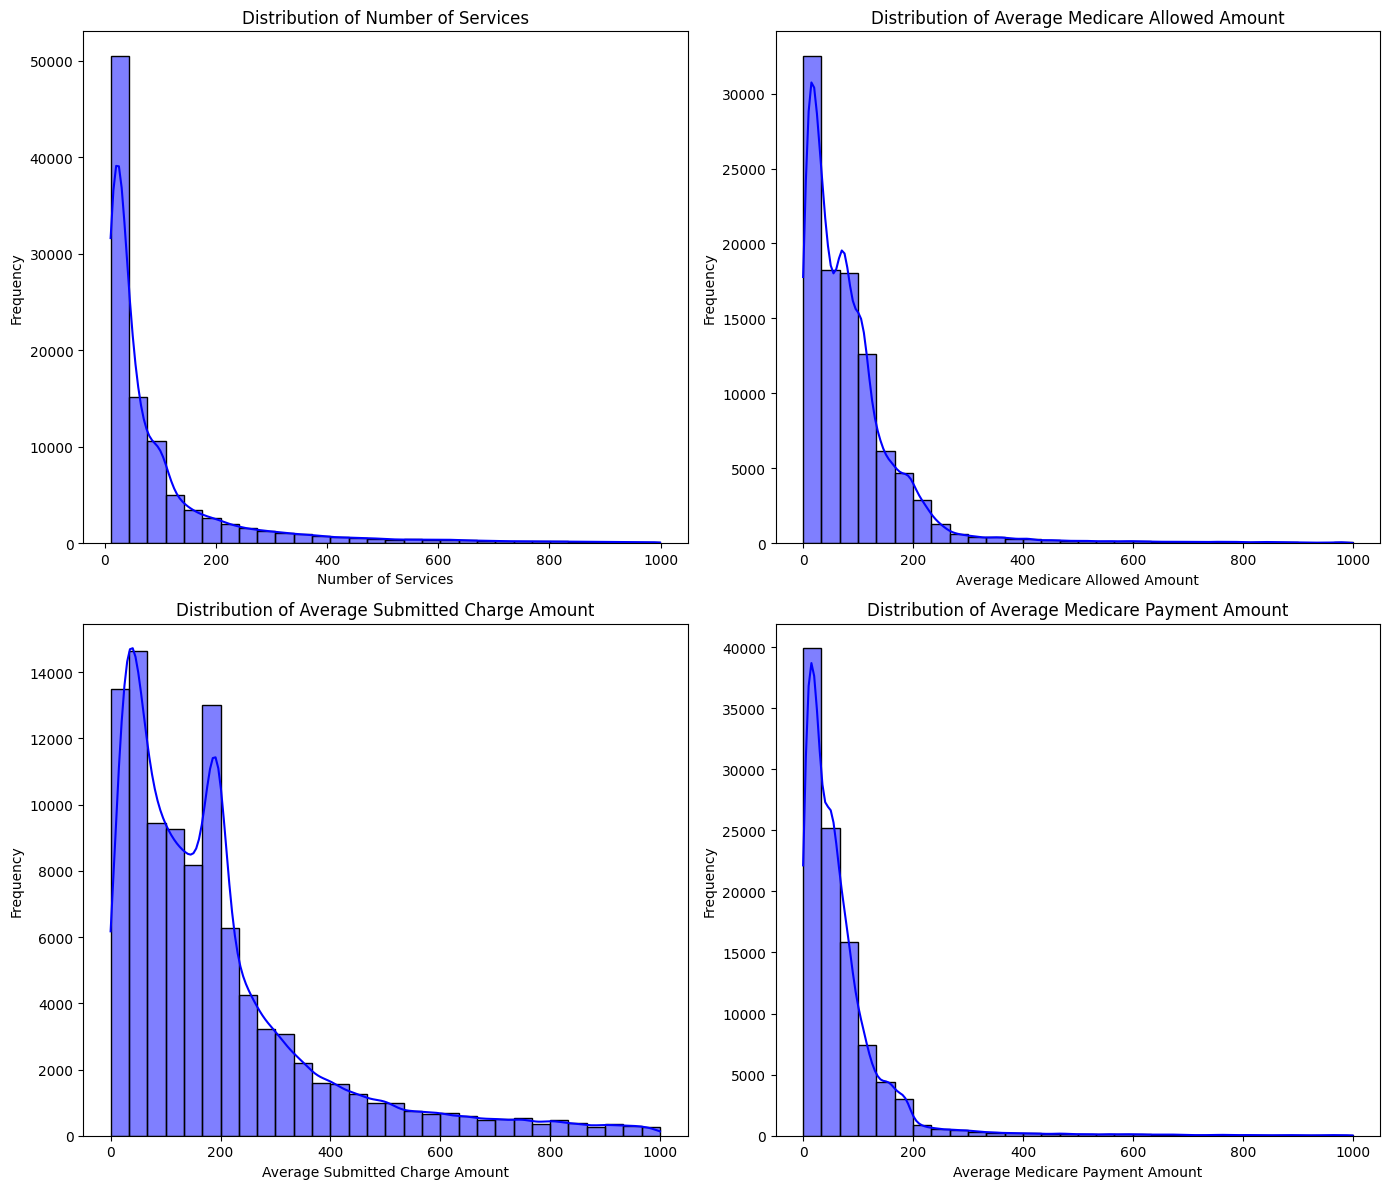

In [16]:
# Plotting the distribution of numeric columns
numeric_columns = [
    'Number of Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]

plt.figure(figsize=(14, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column].dropna(), bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation Matrix

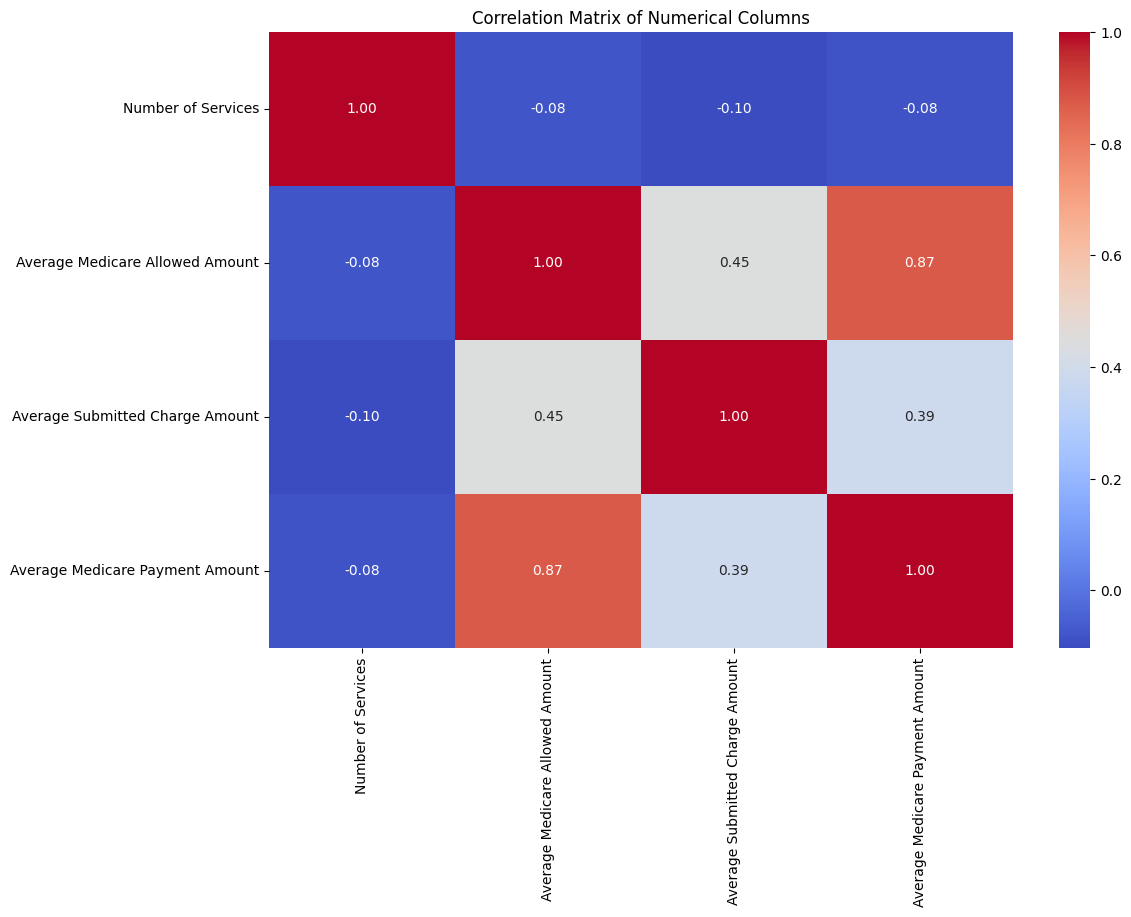

In [17]:
# Plotting the correlation matrix of numerical columns
corr_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Pairplot of Numerical Variables

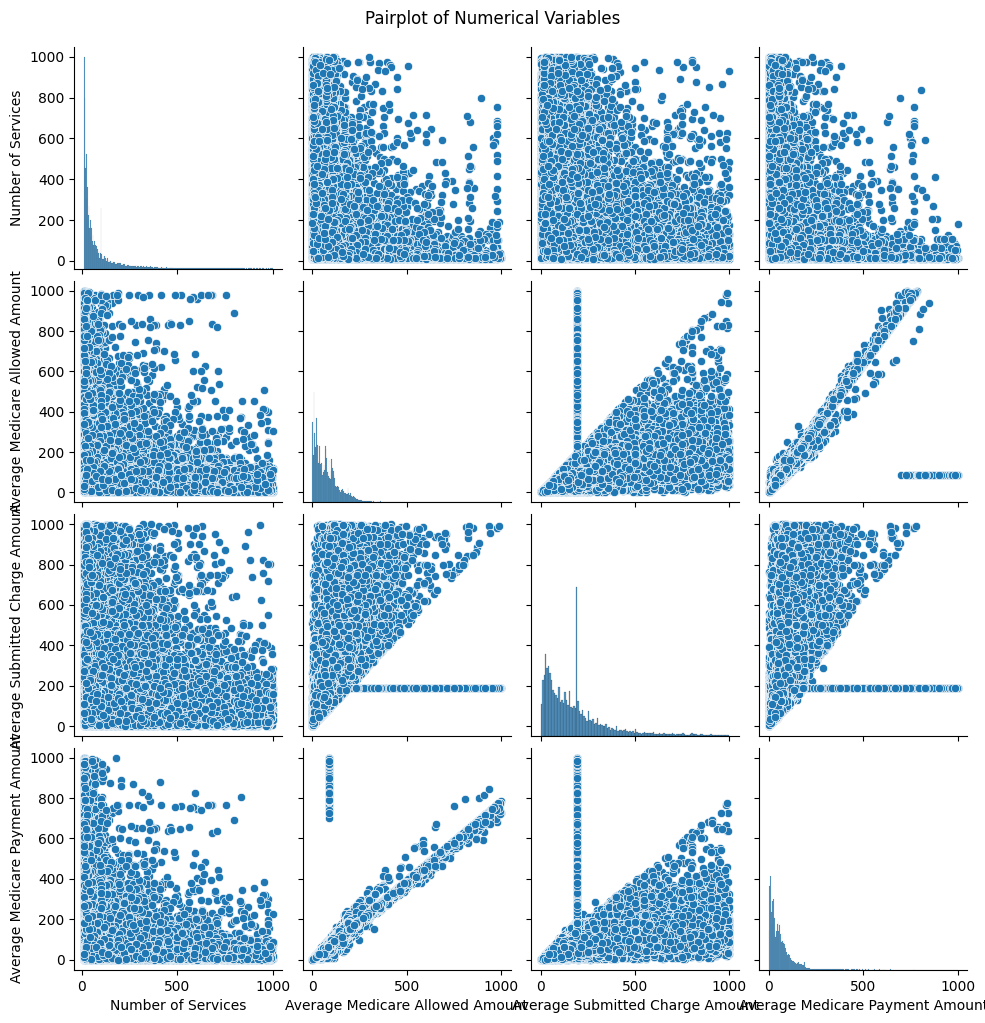

In [18]:
# Plotting the pairplot of numerical variables
sns.pairplot(data[numeric_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

### 2. Bivariate Analysis

---



Provider Gender Distribution by State

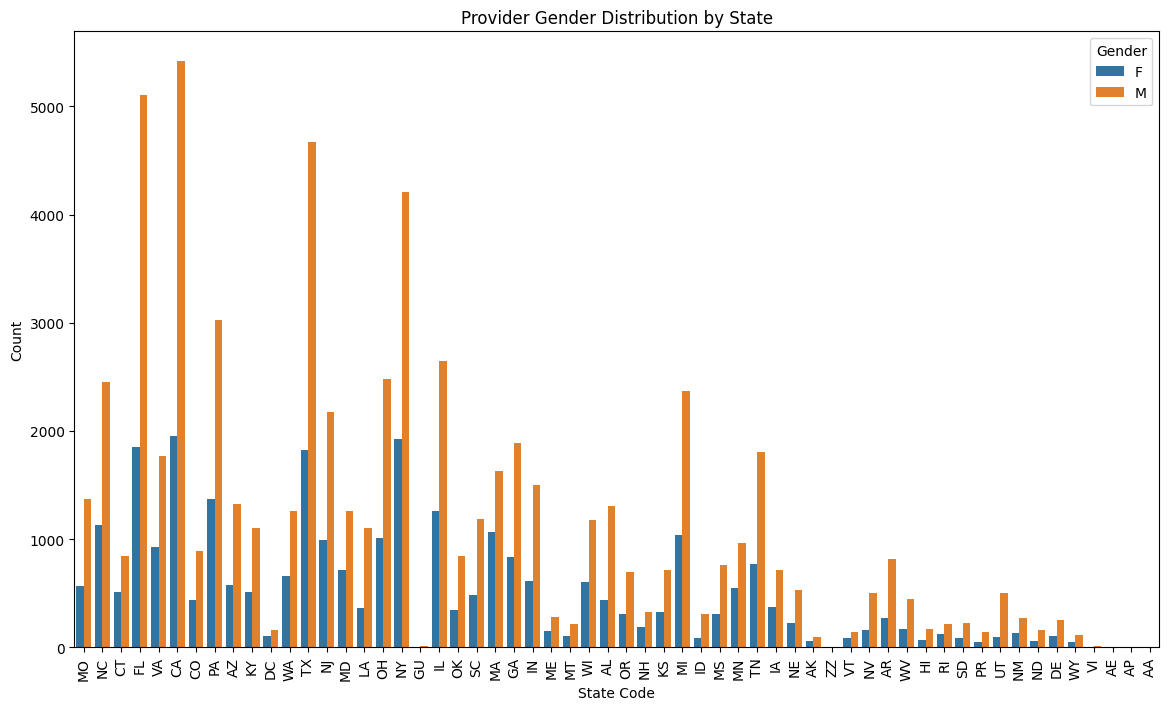

In [19]:
# Countplot of provider gender distribution by state
plt.figure(figsize=(14, 8))
sns.countplot(x='State Code of the Provider', hue='Gender of the Provider', data=data)
plt.title('Provider Gender Distribution by State')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

Average Submitted Charge vs. Average Payment

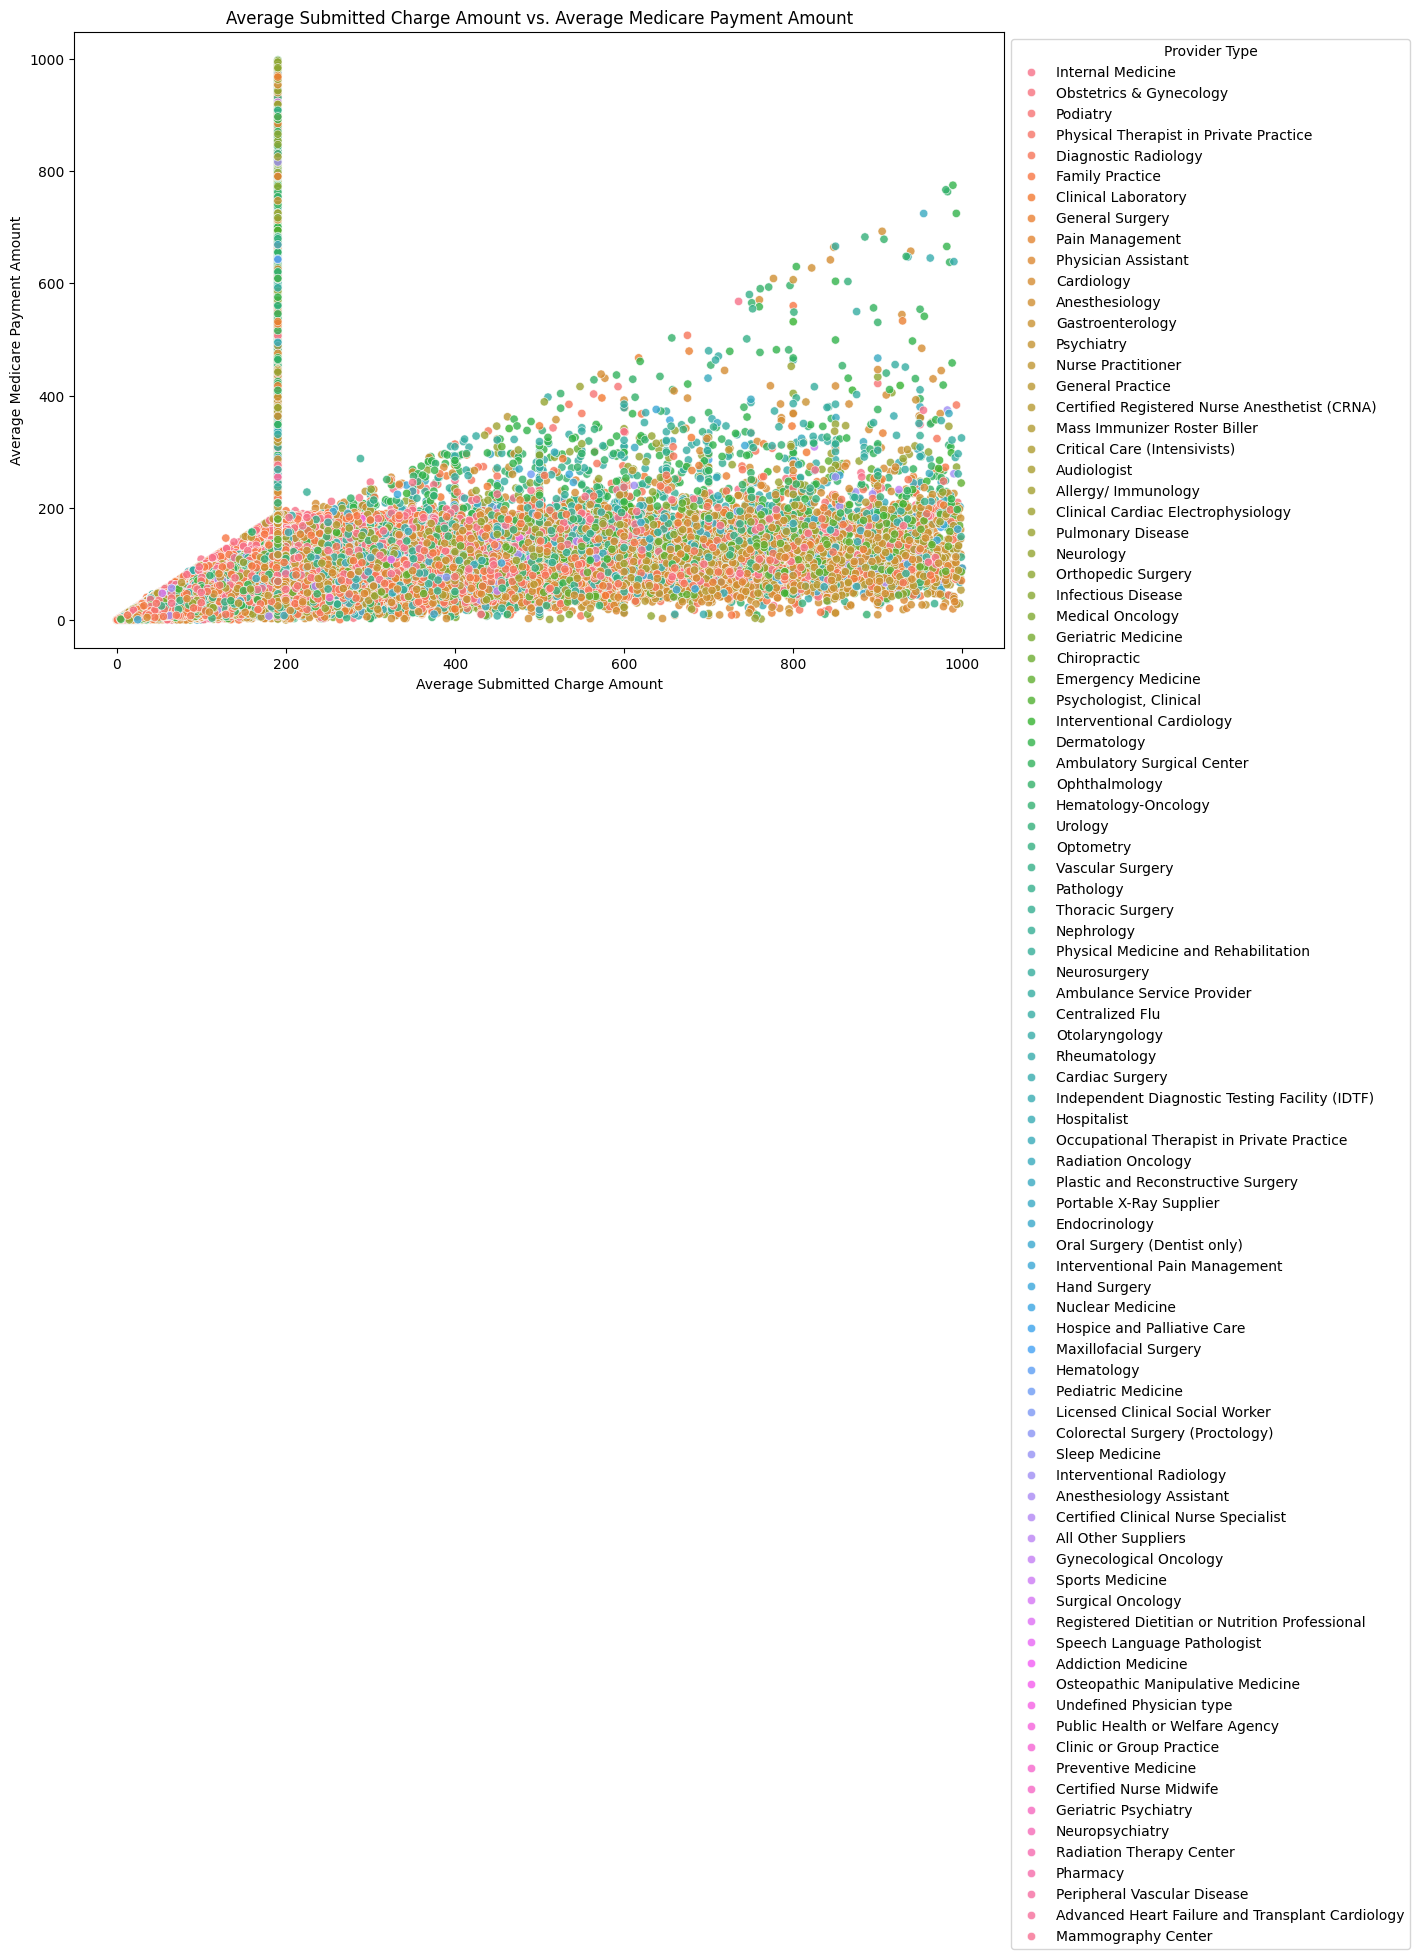

In [20]:
# Scatter plot of average submitted charge vs. average payment
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', data=data, hue='Provider Type', alpha=0.8)
plt.title('Average Submitted Charge Amount vs. Average Medicare Payment Amount')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.legend(title='Provider Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Average Medicare Payment Amount by Provider Type

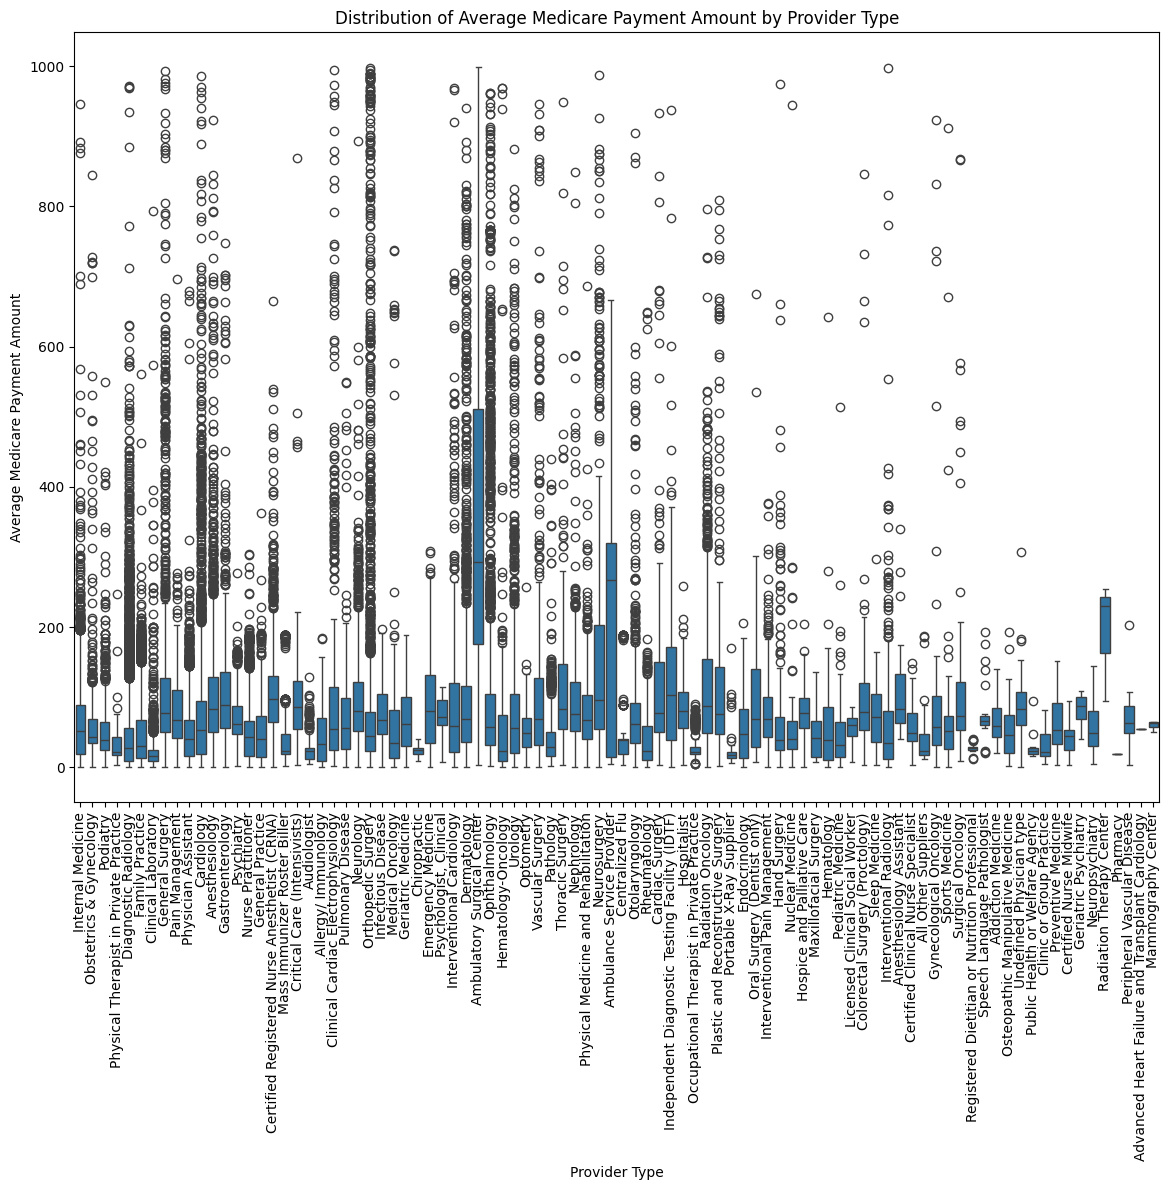

In [21]:
# Boxplot of average Medicare payment amount by provider type
plt.figure(figsize=(14, 10))
sns.boxplot(x='Provider Type', y='Average Medicare Payment Amount', data=data)
plt.title('Distribution of Average Medicare Payment Amount by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=90)
plt.show()

Average Number of Services by State and Gender

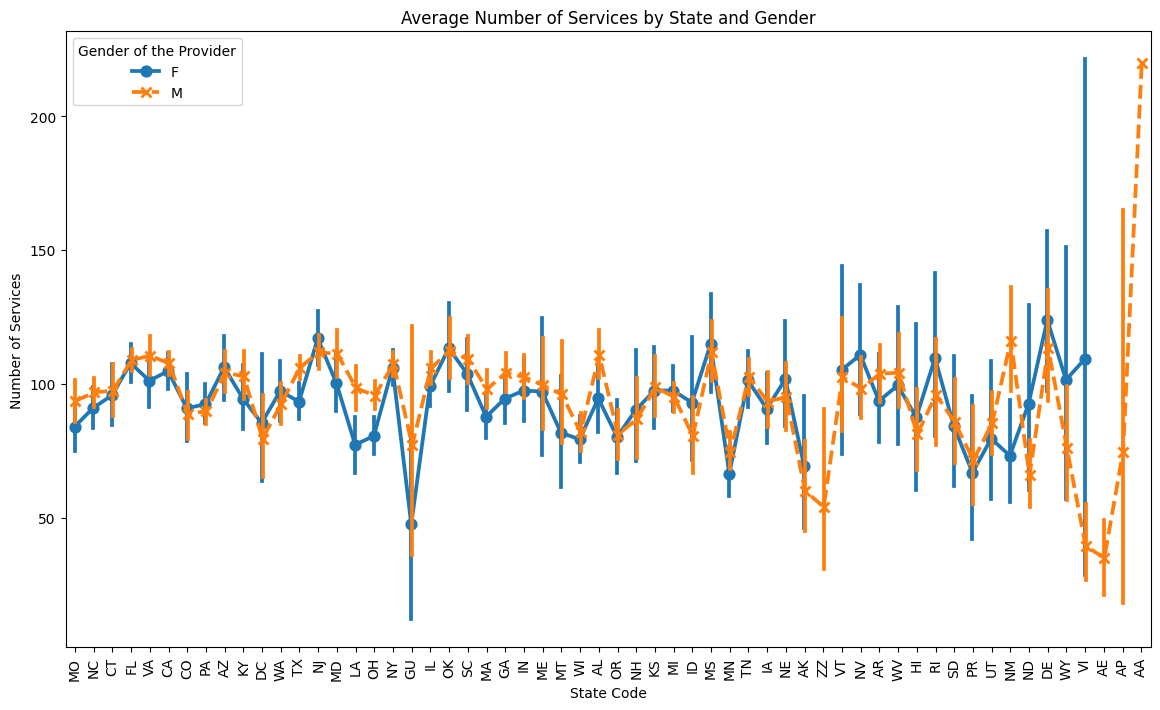

In [22]:
# Point plot of average number of services by state and gender
plt.figure(figsize=(14, 8))
sns.pointplot(x='State Code of the Provider', y='Number of Services', hue='Gender of the Provider', data=data, dodge=True, markers=["o", "x"], linestyles=["-", "--"])
plt.title('Average Number of Services by State and Gender')
plt.xlabel('State Code')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.show()

Correlation between Number of Services and Payment Amounts

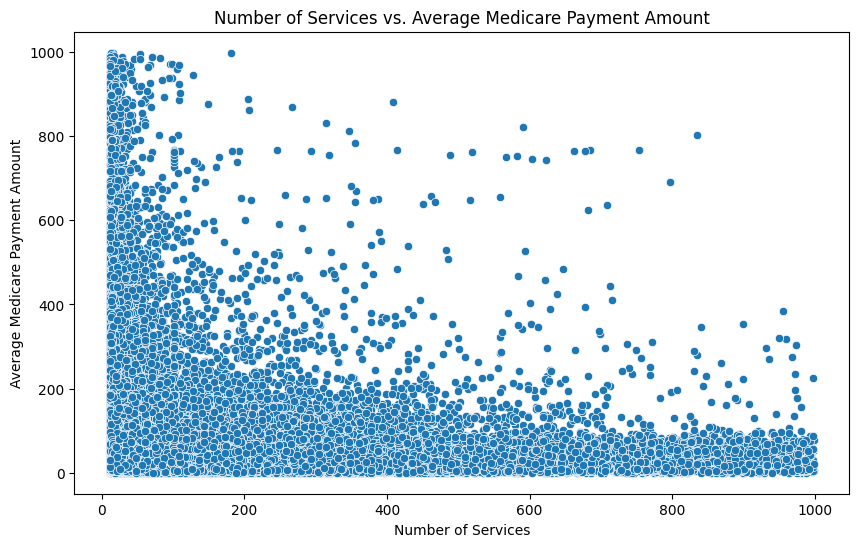

In [23]:
# Scatter plot of number of services vs. average Medicare payment amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Services', y='Average Medicare Payment Amount', data=data)
plt.title('Number of Services vs. Average Medicare Payment Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

Average Submitted Charge Amount by City

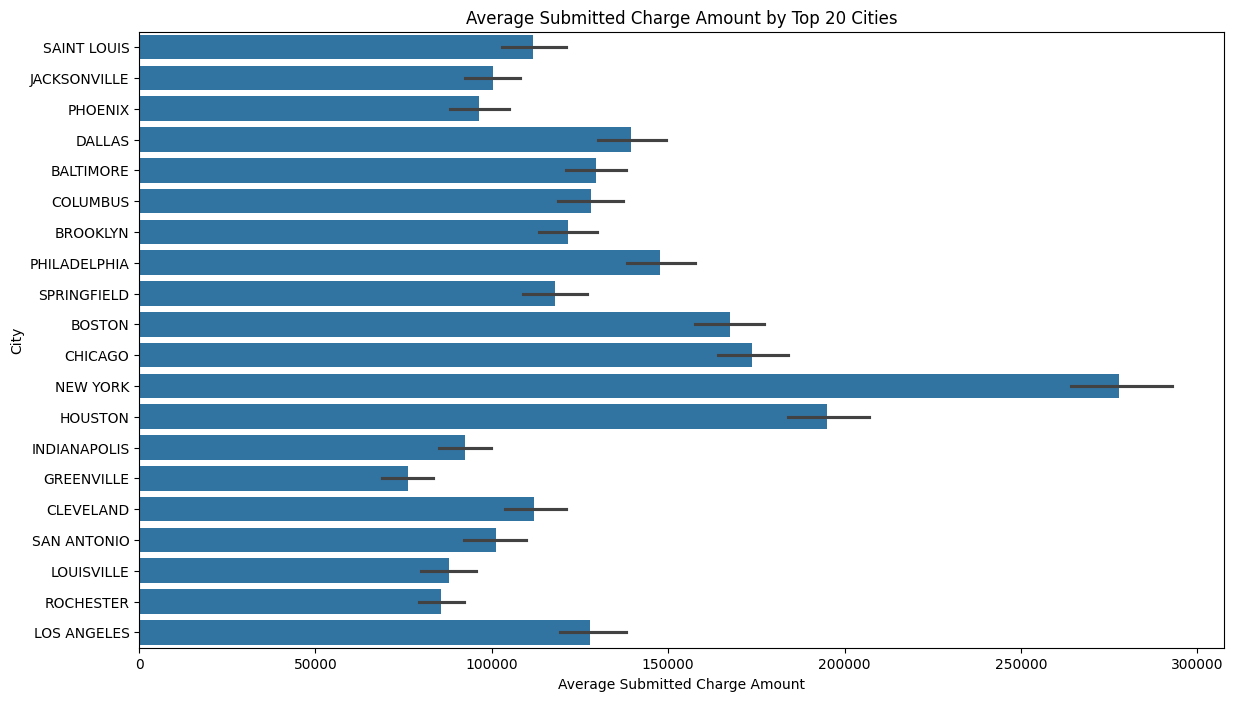

In [24]:
# Bar graph of average submitted charge amount by city
top_20_cities = data['City of the Provider'].value_counts().head(20).index
filtered_city_data = data[data['City of the Provider'].isin(top_20_cities)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Average Submitted Charge Amount', y='City of the Provider', data=filtered_city_data, estimator=sum)
plt.title('Average Submitted Charge Amount by Top 20 Cities')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('City')
plt.show()

Distribution of Top 20 Provider Credentials by Gender

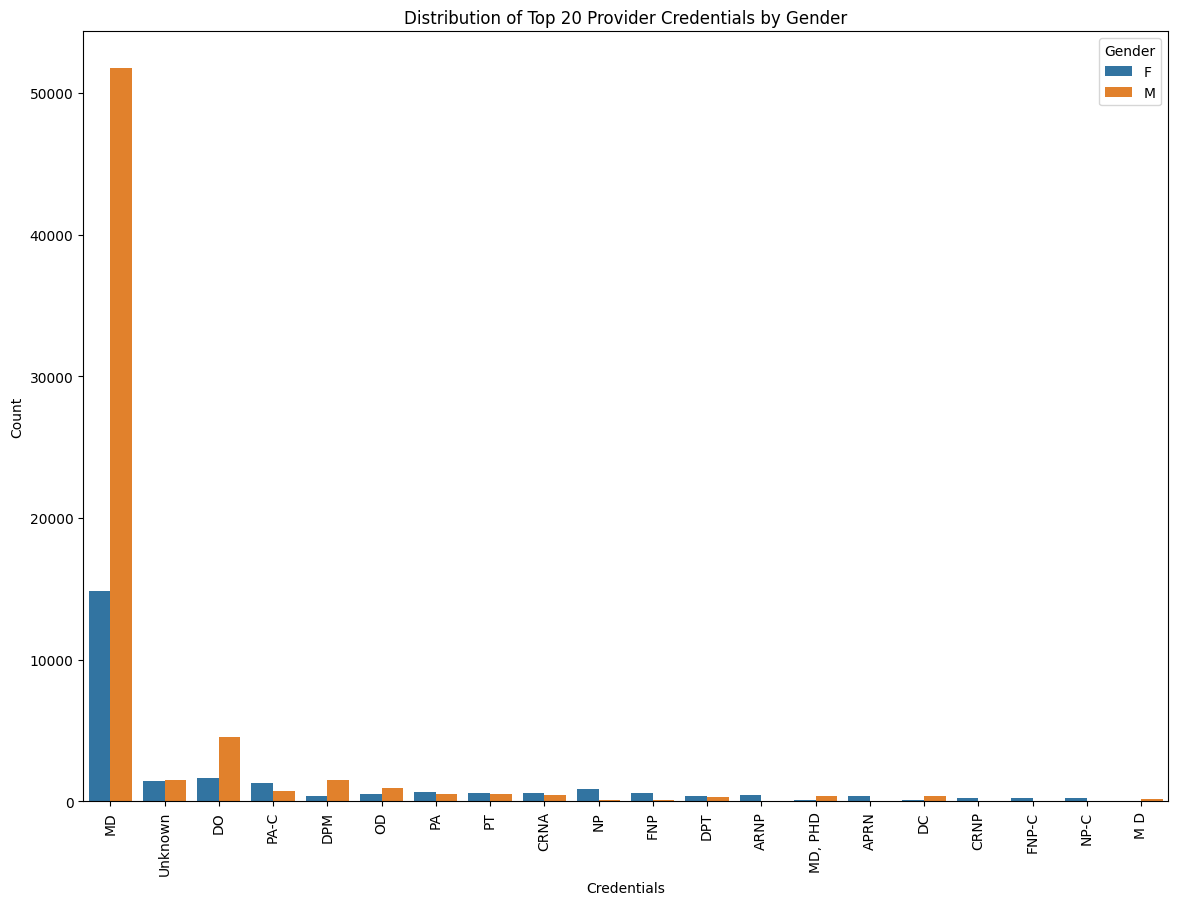

In [25]:
# Bar graph of the distribution of top 20 provider credentials by gender
data['Credentials of the Provider'] = data['Credentials of the Provider'].fillna('Unknown')
top_20_credentials = data['Credentials of the Provider'].value_counts().head(20).index
filtered_credential_data = data[data['Credentials of the Provider'].isin(top_20_credentials)]

plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_credential_data, x='Credentials of the Provider', hue='Gender of the Provider', order=top_20_credentials)
plt.title('Distribution of Top 20 Provider Credentials by Gender')
plt.xlabel('Credentials')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

Average Medicare Payment Amount by Credentials

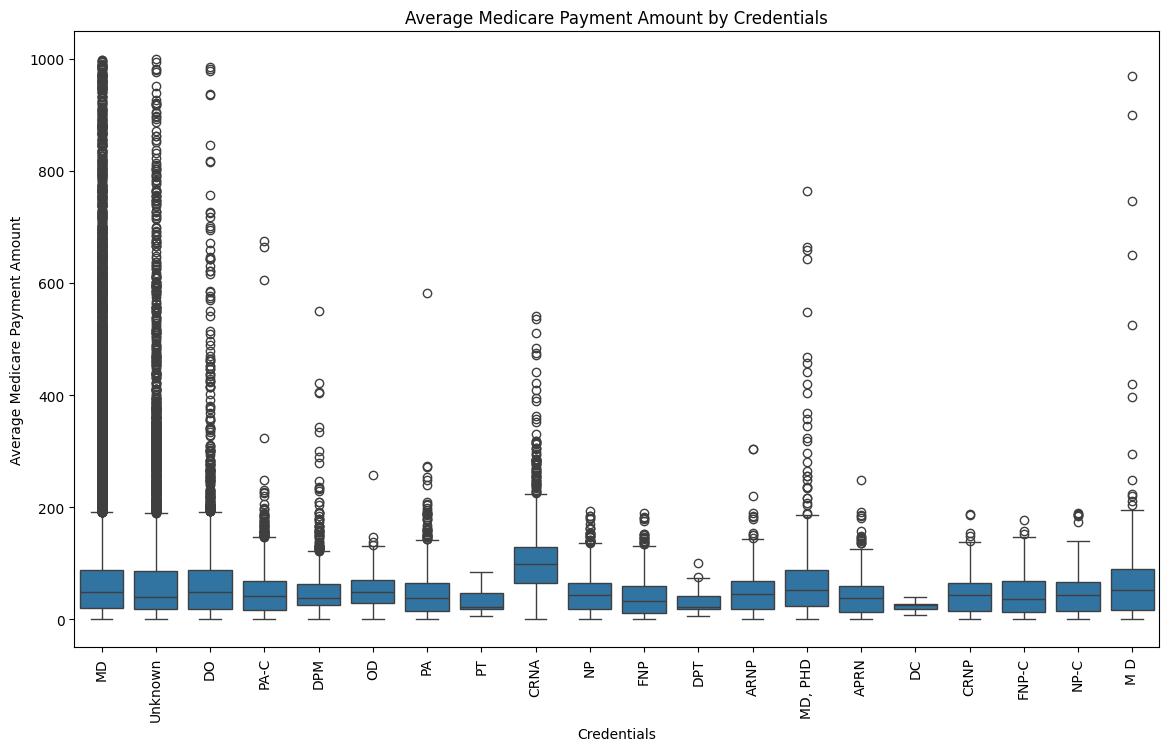

In [26]:
# Boxplot of average Medicare payment amount by credentials
plt.figure(figsize=(14, 8))
sns.boxplot(x='Credentials of the Provider', y='Average Medicare Payment Amount', data=filtered_credential_data, order=top_20_credentials)
plt.title('Average Medicare Payment Amount by Credentials')
plt.xlabel('Credentials')
plt.ylabel('Average Medicare Payment Amount')
plt.xticks(rotation=90)
plt.show()

### 3. Additional Insights

---



Insights on Provider Gender Distribution

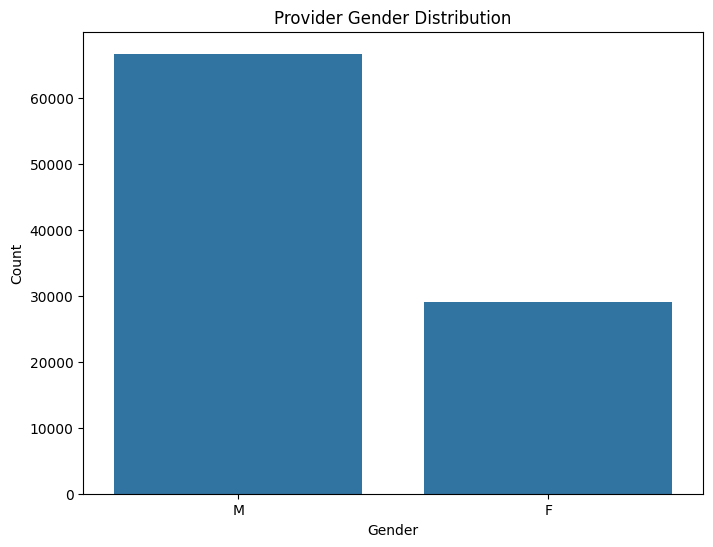

In [27]:
# Insights on provider gender distribution
gender_counts = data['Gender of the Provider'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Provider Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Insights on Provider Type Distribution

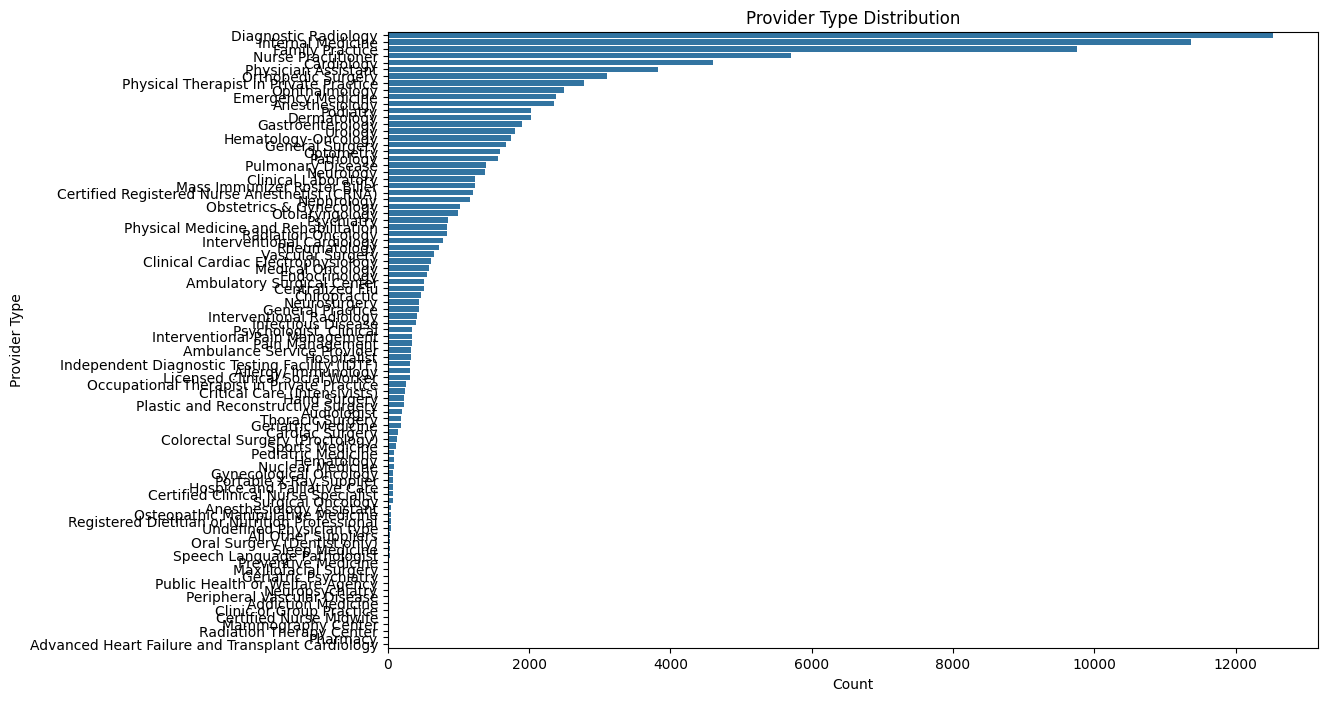

In [28]:
# Insights on provider type distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Provider Type', data=data, order=data['Provider Type'].value_counts().index)
plt.title('Provider Type Distribution')
plt.xlabel('Count')
plt.ylabel('Provider Type')
plt.show()

Insights on State-wise Distribution of Providers

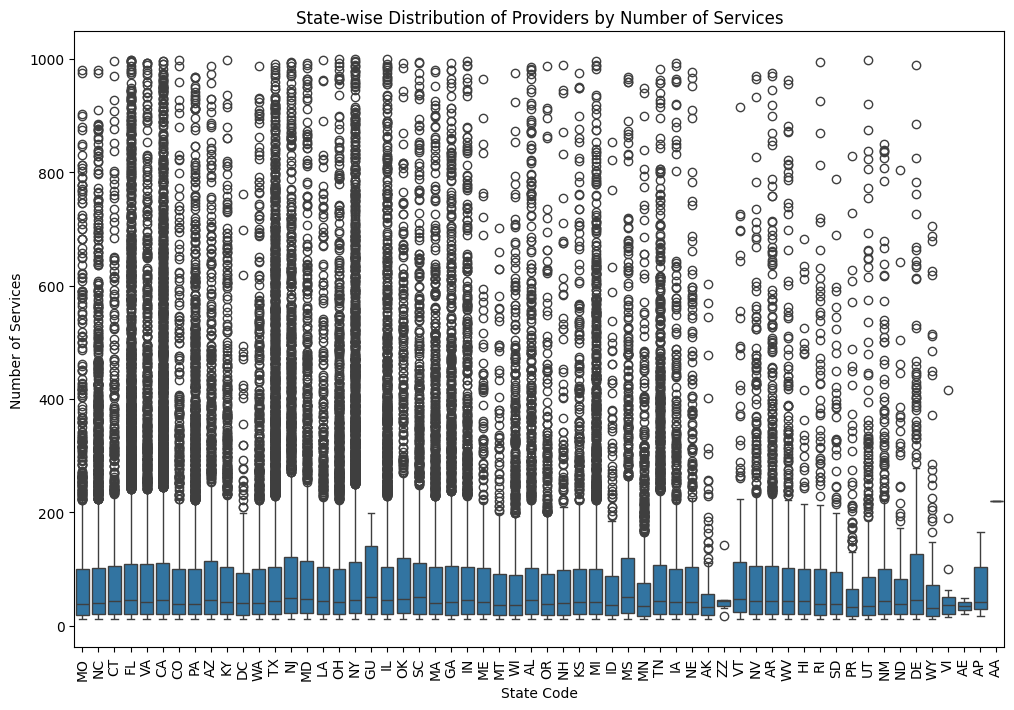

In [29]:
# Insights on state-wise distribution of providers
plt.figure(figsize=(12, 8))
sns.boxplot(x='State Code of the Provider', y='Number of Services', data=data)
plt.title('State-wise Distribution of Providers by Number of Services')
plt.xlabel('State Code')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.show()

Insights on Distribution of Number of Services

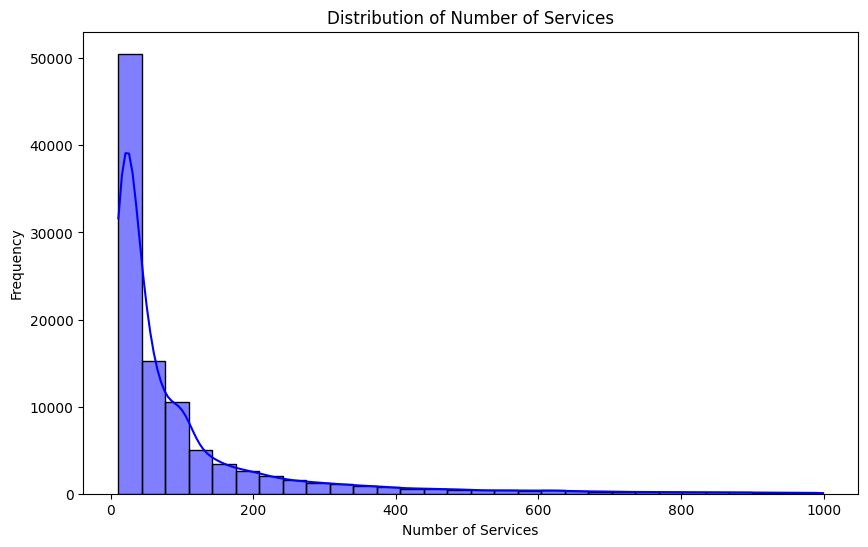

In [30]:
# Insights on distribution of number of services
plt.figure(figsize=(10, 6))
sns.histplot(data['Number of Services'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Frequency')
plt.show()